In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
from sklearn.preprocessing import LabelEncoder
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [9]:
df.drop(columns = ['id'], axis = 1, inplace = True)
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.891862,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.891862,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [10]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.891862,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.891862,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
features = df.drop(columns = ['stroke'], axis = 1)
target = df['stroke']
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(features, target)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .2, random_state = 42)

In [13]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7771, 10)
(1943, 10)
(7771,)
(1943,)


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, model.predict(X_test))
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print("Confusion Matrix: \n", cm)
print("Model testing accuracy:", ((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))*100, "%", sep=' ')
print(f'K-Fold Validation Mean Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Precision Score: {precision_score(y_test, model.predict(X_test))*100:.2f}%')
print(f'Recall Score: {recall_score(y_test, model.predict(X_test))*100:.2f}%')
print(f'F1 Score: {f1_score(y_test, model.predict(X_test))*100:.2f}%')
print()

Confusion Matrix: 
 [[895  68]
 [ 40 940]]
Model testing accuracy: 94.44158517756047 %
K-Fold Validation Mean Accuracy: 94.03%
Precision Score: 93.25%
Recall Score: 95.92%
F1 Score: 94.57%



In [18]:
from sklearn.model_selection import GridSearchCV, KFold
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.5],
    'gamma': [0, 0.5, 1],
    'booster': ['gbtree', 'gblinear']
}

grid_search = GridSearchCV(
    XGBClassifier(n_jobs = -1), param_grid = param_grid, scoring = 'accuracy', cv = KFold(n_splits = 5), verbose = 1, n_jobs = -1
)
grid_search.fit(X_train, y_train)
best = grid_search.best_estimator_
print(best)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


KeyboardInterrupt: 

In [19]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.1, booster='gbtree', gamma=0, reg_lambda=0, n_jobs=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [20]:

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, model.predict(X_test))

print("Confusion Matrix: \n", cm)
print("Model testing accuracy:", ((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))*100, "%", sep=' ')
print(f'Precision Score: {precision_score(y_test, model.predict(X_test))*100:.2f}%')
print(f'Recall Score: {recall_score(y_test, model.predict(X_test))*100:.2f}%')
print(f'F1 Score: {f1_score(y_test, model.predict(X_test))*100:.2f}%')
print()

Confusion Matrix: 
 [[897  66]
 [ 31 949]]
Model testing accuracy: 95.00772002058672 %
Precision Score: 93.50%
Recall Score: 96.84%
F1 Score: 95.14%



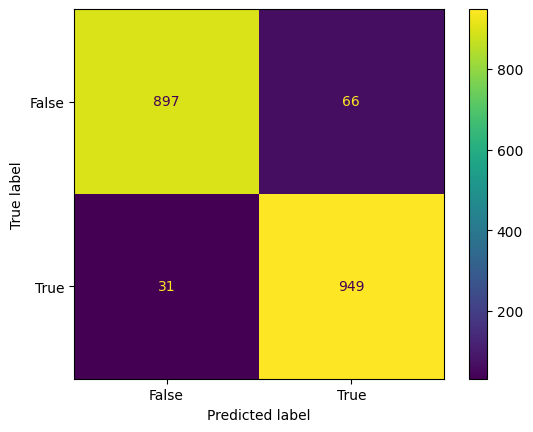

In [21]:
cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm.plot()